<a href="https://colab.research.google.com/github/GuzVenegas/flight_delay_data/blob/main/Flight_Dalay_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight on time

## Preparando el ambiente

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando base de datos
flight_data = pd.read_csv("/content/flight_data_2024.csv")

/tmp/ipython-input-2362105892.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv("/content/flight_data_2024.csv")


In [5]:
# Importando diccionario de la base de datos
# data_dictionary = pd.read_csv("/content/flight_data_2024_data_dictionary.csv")

In [6]:
# Importando sample_DataSet
# sample_dataset = pd.read_csv("/content/flight_data_2024_sample.csv")

## Conociendo la base de datos

In [7]:
flight_data.shape

(7079081, 35)

In [8]:
flight_data.sample(5)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
747466,2024,2,12,1,2024-02-12,G4,1586.0,PVU,"Provo, UT",Utah,...,0,110.0,102.0,72.0,477.0,0,0,0,0,0
4209087,2024,8,6,2,2024-08-06,MQ,3656.0,LIT,"Little Rock, AR",Arkansas,...,0,121.0,116.0,80.0,552.0,0,0,0,0,0
1427650,2024,3,20,3,2024-03-20,AA,1699.0,CLT,"Charlotte, NC",North Carolina,...,0,105.0,92.0,73.0,468.0,0,0,0,0,0
1796775,2024,4,8,1,2024-04-08,AA,2572.0,DFW,"Dallas/Fort Worth, TX",Texas,...,0,115.0,139.0,105.0,641.0,3,0,24,0,26
2708718,2024,5,24,5,2024-05-24,WN,1856.0,AUS,"Austin, TX",Texas,...,0,230.0,223.0,208.0,1481.0,12,0,0,0,25


In [9]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay            float64
 23  cancelled            int64  
 24

In [10]:
flight_data.describe(include='object').transpose()

,count,unique,top,freq
fl_date,7079081,366,2024-12-01,21764
op_unique_carrier,7079081,15,WN,1419419
origin,7079081,348,ATL,341910
origin_city_name,7079081,342,"Chicago, IL",359685
origin_state_nm,7079081,52,Texas,751839
dest,7079081,348,ATL,341844
dest_city_name,7079081,342,"Chicago, IL",359640
dest_state_nm,7079081,52,Texas,751859
cancellation_code,96315,4,B,53605


In [11]:
flight_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,7079081.0,2024.000000,0.000000,2024.0,2024.0,2024.0,2024.0,2024.0
month,7079081.0,6.584868,3.396806,1.0,4.0,7.0,10.0,12.0
day_of_month,7079081.0,15.784451,8.786433,1.0,8.0,16.0,23.0,31.0
day_of_week,7079081.0,3.981945,2.012279,1.0,2.0,4.0,6.0,7.0
op_carrier_fl_num,7079080.0,2504.622501,1652.252505,1.0,1151.0,2227.0,3717.0,8819.0
crs_dep_time,7079081.0,1327.299824,493.030621,1.0,905.0,1320.0,1736.0,2400.0
dep_time,6986422.0,1330.765191,509.477907,1.0,908.0,1325.0,1746.0,2400.0
dep_delay,6986111.0,12.677082,56.059970,-96.0,-6.0,-2.0,9.0,3777.0
taxi_out,6983347.0,17.904450,9.677410,1.0,12.0,15.0,21.0,214.0
wheels_off,6983347.0,1353.541910,512.047456,1.0,924.0,1338.0,1801.0,2400.0


In [12]:
# Ubicando las variables con mayor número de NaN values
missing_data = flight_data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=False)

,0
cancellation_code,6982766
air_time,113814
actual_elapsed_time,113814
arr_delay,113814
wheels_on,97856
taxi_in,97856
arr_time,97854
wheels_off,95734
taxi_out,95734
dep_delay,92970


In [13]:
# Nombre las variables con missing values > 0
missing_data.index

Index(['op_carrier_fl_num', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'arr_time', 'arr_delay', 'cancellation_code',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time'],
      dtype='object')

In [14]:
missing_data_Dict = dict(missing_data)


In [15]:
missingPercentage = {k:round(((v/flight_data.shape[0])*100),1) for k,v in zip(missing_data.index,missing_data.values)}


In [16]:
missing_penrcent = pd.Series(missingPercentage).sort_values(ascending=False)
missing_penrcent

,0
cancellation_code,98.6
air_time,1.6
actual_elapsed_time,1.6
arr_delay,1.6
wheels_off,1.4
arr_time,1.4
taxi_in,1.4
wheels_on,1.4
taxi_out,1.4
dep_delay,1.3


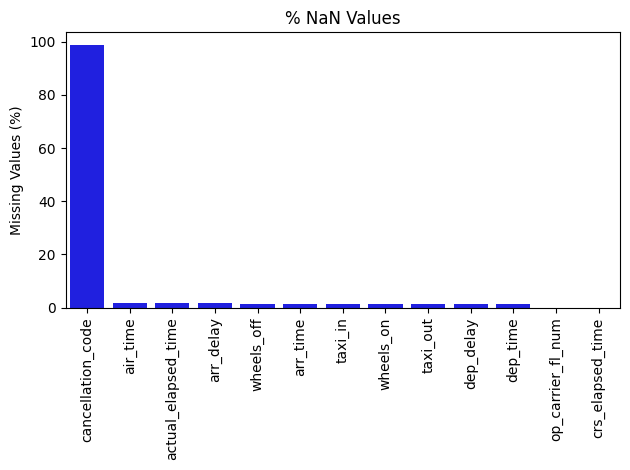

In [17]:
sns.barplot(x=missing_penrcent.index, y=missing_penrcent.values, color="blue")
plt.title("% NaN Values")
plt.xlabel("")
plt.ylabel("Missing Values (%)")
plt.xticks(rotation=90)
plt.tight_layout()

In [18]:
# Creando una copia del dataset original
flight_delay_data = flight_data.copy()


In [20]:
flight_delay_data.shape

(7079081, 35)

In [23]:
flight_delay_data.drop(['year','cancellation_code'],axis=1,inplace=True)

In [26]:
flight_delay_data[['op_carrier_fl_num', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
                  'wheels_on', 'taxi_in', 'arr_time', 'arr_delay',
                   'crs_elapsed_time', 'actual_elapsed_time', 'air_time']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
op_carrier_fl_num,7079080.0,2504.622501,1652.252505,1.0,1151.0,2227.0,3717.0,8819.0
dep_time,6986422.0,1330.765191,509.477907,1.0,908.0,1325.0,1746.0,2400.0
dep_delay,6986111.0,12.677082,56.059970,-96.0,-6.0,-2.0,9.0,3777.0
taxi_out,6983347.0,17.904450,9.677410,1.0,12.0,15.0,21.0,214.0
wheels_off,6983347.0,1353.541910,512.047456,1.0,924.0,1338.0,1801.0,2400.0
wheels_on,6981225.0,1458.723781,540.432750,1.0,1041.0,1500.0,1915.0,2400.0
taxi_in,6981225.0,8.326030,6.844510,1.0,5.0,6.0,10.0,444.0
arr_time,6981227.0,1461.854244,545.996172,1.0,1044.0,1503.0,1919.0,2400.0
arr_delay,6965267.0,7.098245,57.991271,-126.0,-15.0,-6.0,9.0,3803.0
crs_elapsed_time,7079080.0,146.766469,72.386924,-160.0,93.0,130.0,177.0,1326.0
